In [34]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [35]:
#import dataset
df = pd.read_csv("Salary_Data.csv")

In [36]:
#EDA and Data Visualization
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [37]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [39]:
df.shape

(30, 2)

In [40]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [41]:
#check for missing values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<Axes: >

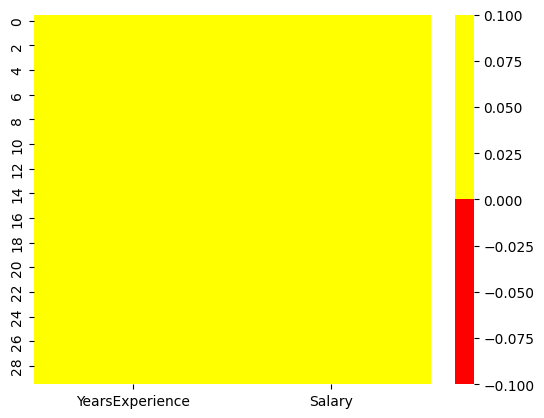

In [42]:
#Heat map
import seaborn as sns
cols = df.columns
colors = ['red','yellow']
sns.heatmap(df[cols].isnull(), cmap= sns.color_palette(colors))

It shows no missing value

In [43]:
#check for duplicate rows
df[df.duplicated()].shape

(0, 2)

No duplicate rows

In [44]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7c17ea3a6ec0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c17ea3a72b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c17ea3a6c80>],
 'medians': [<matplotlib.lines.Line2D at 0x7c17ea3a77f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c17ea3a7a90>],
 'means': []}

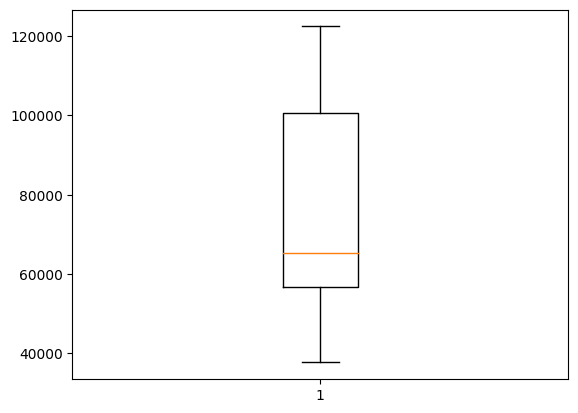

In [45]:
#outlier Detection
import matplotlib.pyplot as plt
plt.boxplot(df['Salary'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7c17ea224e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7c17ea2252a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c17ea224bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c17ea2257e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c17ea225a80>],
 'means': []}

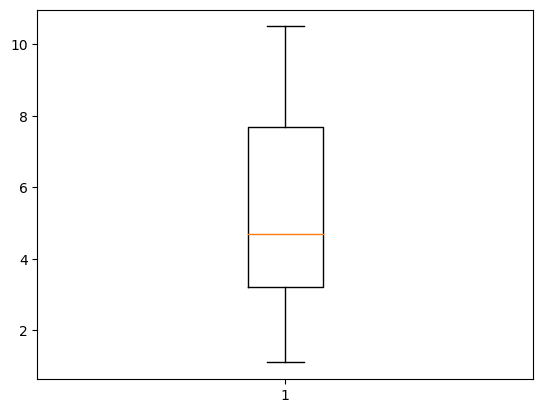

In [46]:
plt.boxplot(df['YearsExperience'])

No outliers


<ipython-input-47-ab1d94ab77e4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["YearsExperience"])


<Axes: xlabel='YearsExperience', ylabel='Density'>

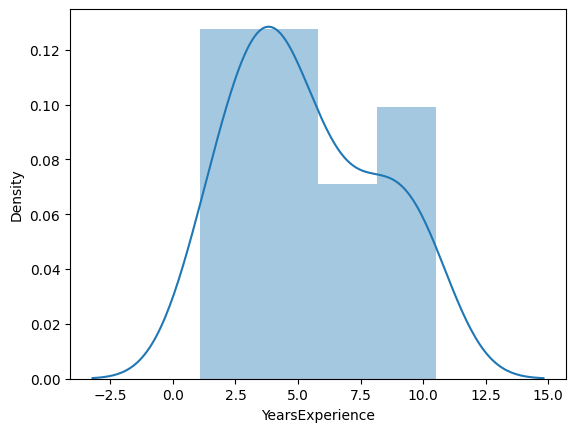

In [47]:
sns.distplot(df["YearsExperience"])

<Axes: xlabel='YearsExperience', ylabel='Salary'>

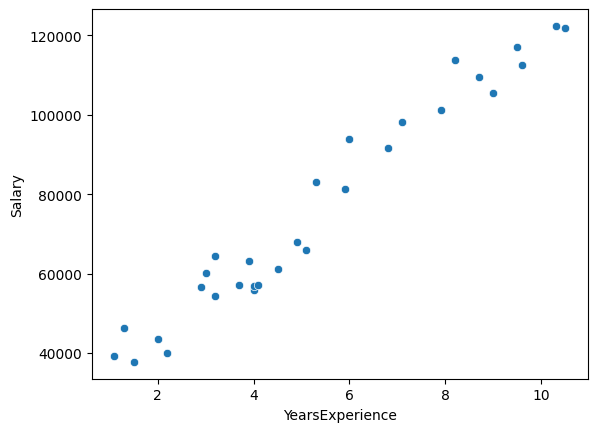

In [48]:
sns.scatterplot(x="YearsExperience",y="Salary",data=df)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

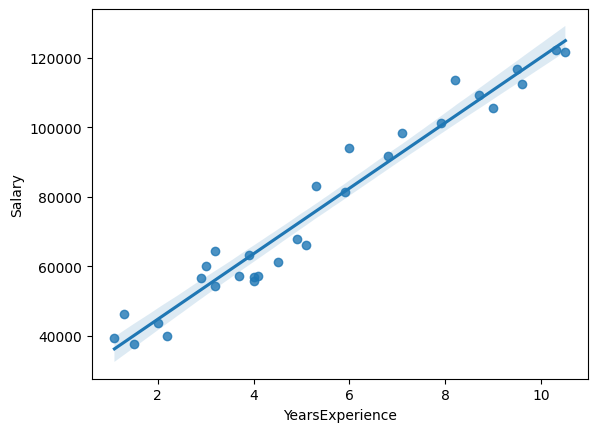

In [49]:
sns.regplot(x="YearsExperience",y="Salary",data=df)

In [50]:
#Correlation Analysis
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [51]:
#Model Building
import statsmodels.formula.api as smf
model = smf.ols("Salary ~ YearsExperience",data = df).fit()

In [52]:
#Model Testing
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           1.14e-20
Time:                        13:13:16   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



Model accuracy is 95.7% which is quite good

### Square Root transformation on data

In [57]:
model1 = smf.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           7.58e-19
Time:                        13:13:17   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared and Adjusted R-squared scores are above 0.85. but its has gotten less than previous model.


F-statitics has gotten a little lower for this model than previous.


Let us Try some data transformation to check whether these scores can get any better than this.


### Cuberoot transformation on Data

In [58]:
model2 = smf.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           6.37e-18
Time:                        13:13:17   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Log transformation on Data

In [59]:
model3 = smf.ols('np.log(Salary)~np.log(YearsExperience)', data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           7.40e-16
Time:                        13:13:17   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Here simple linear model fits best because it's accuracy is greater than any transformed model.

In [60]:
pred = model.predict(df["YearsExperience"])

In [61]:
model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [62]:
rmse = np.sqrt(np.mean((np.array(df["Salary"])-np.array(pred))**2))
rmse

5592.043608760662

<Axes: xlabel='YearsExperience', ylabel='Salary'>

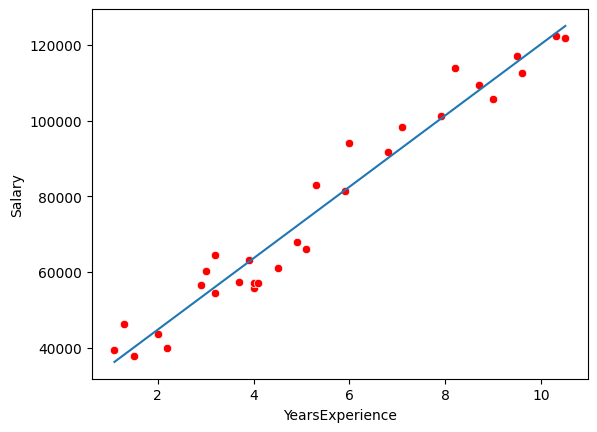

In [63]:
sns.scatterplot(x="YearsExperience",y="Salary",data=df,color="red")
sns.lineplot(x="YearsExperience",y=pred,data=df)

# Model Validation

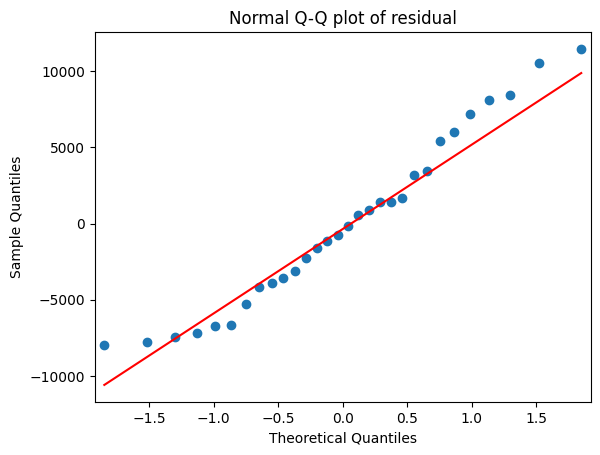

In [67]:
#QQ plot
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residual')
plt.show()

<ipython-input-68-509b5ba2bd64>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model.resid_pearson)


<Axes: ylabel='Density'>

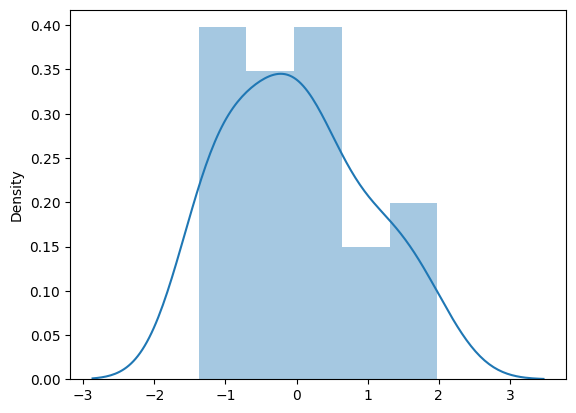

In [68]:
sns.distplot(model.resid_pearson)

<Axes: >

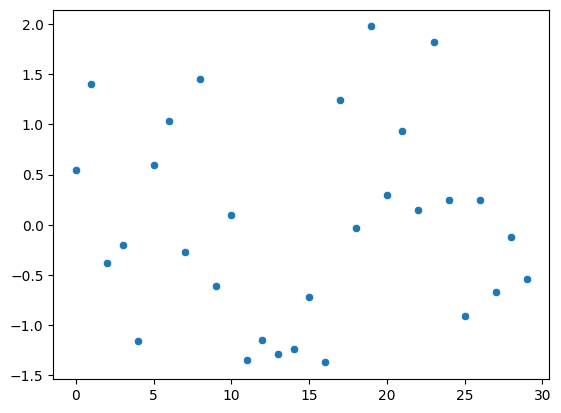

In [69]:
sns.scatterplot(model.resid_pearson)

In [64]:
#Data Prediction
new_data = pd.Series([11,12])
new_data

0    11
1    12
dtype: int64

In [65]:
dp = pd.DataFrame(new_data, columns =['YearsExperience'])
dp

,YearsExperience
0,11
1,12


In [66]:
model.predict(dp)

0    129741.785735
1    139191.748056
dtype: float64

Here simple linear model fits best.
